<a href="https://colab.research.google.com/github/Faizdk/Advance-Big-Data/blob/main/MentalHealthAnalysis_UASBDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Load dataset
file_path = ('/content/drive/MyDrive/bdl/Mental_Health_Dataset.csv')
data = pd.read_csv(file_path)

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


#Preprocessing Data

In [ ]:
# Mengganti nama kolom untuk konsistensi (mengubah huruf kapital dan mengganti spasi dengan garis bawah)
data.rename(columns=lambda x: x.strip().replace(" ", "_").lower(), inplace=True)

# Menampilkan nama kolom setelah perubahan
data.columns.tolist()

['timestamp',
 'gender',
 'country',
 'occupation',
 'self_employed',
 'family_history',
 'treatment',
 'days_indoors',
 'growing_stress',
 'changes_habits',
 'mental_health_history',
 'mood_swings',
 'coping_struggles',
 'work_interest',
 'social_weakness',
 'mental_health_interview',
 'care_options']

In [ ]:
# Menghapus baris yang memiliki nilai kosong di kolom 'self_employed'
data = data.dropna(subset=['self_employed'])

In [ ]:
# Convert 'Timestamp' to datetime format
data['timestamp'] = pd.to_datetime(data['timestamp'], errors='coerce')

data.head()

,timestamp,gender,country,occupation,self_employed,family_history,treatment,days_indoors,growing_stress,changes_habits,mental_health_history,mood_swings,coping_struggles,work_interest,social_weakness,mental_health_interview,care_options
3,2014-08-27 11:37:00,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,2014-08-27 11:43:00,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
5,2014-08-27 11:49:00,Female,Poland,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Not sure
6,2014-08-27 11:51:00,Female,Australia,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
7,2014-08-27 11:52:00,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No


In [ ]:
# Menampilkan Statistik Deskriptif
print(data.describe(include='all'))

                            timestamp  gender        country occupation  \
count                          287162  287162         287162     287162   
unique                            NaN       2             35          5   
top                               NaN    Male  United States  Housewife   
freq                              NaN  235950         168056      65173   
mean    2014-09-09 09:40:05.724155648     NaN            NaN        NaN   
min               2014-08-27 11:35:00     NaN            NaN        NaN   
25%               2014-08-27 14:27:00     NaN            NaN        NaN   
50%               2014-08-28 02:32:00     NaN            NaN        NaN   
75%               2014-08-28 22:46:00     NaN            NaN        NaN   
max               2016-02-01 23:04:00     NaN            NaN        NaN   

       self_employed family_history treatment days_indoors growing_stress  \
count         287162         287162    287162       287162         287162   
unique             2

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Menghapus kolom yang tidak relevan untuk korelasi
data_cleaned = data.drop(columns=['timestamp', 'occupation', 'country'])

# Mengonversi kolom menjadi numerik
data_cleaned['gender'] = label_encoder.fit_transform(data_cleaned['gender'])
data_cleaned['self_employed'] = label_encoder.fit_transform(data_cleaned['self_employed'])
data_cleaned['family_history'] = label_encoder.fit_transform(data_cleaned['family_history'])
data_cleaned['treatment'] = label_encoder.fit_transform(data_cleaned['treatment'])
data_cleaned['mental_health_history'] = label_encoder.fit_transform(data_cleaned['mental_health_history'])
data_cleaned['mood_swings'] = label_encoder.fit_transform(data_cleaned['mood_swings'])
data_cleaned['coping_struggles'] = label_encoder.fit_transform(data_cleaned['coping_struggles'])
data_cleaned['work_interest'] = label_encoder.fit_transform(data_cleaned['work_interest'])
data_cleaned['social_weakness'] = label_encoder.fit_transform(data_cleaned['social_weakness'])
data_cleaned['days_indoors'] = label_encoder.fit_transform(data_cleaned['days_indoors'])
data_cleaned['mental_health_interview'] = label_encoder.fit_transform(data_cleaned['mental_health_interview'])
data_cleaned['growing_stress'] = label_encoder.fit_transform(data_cleaned['growing_stress'])
data_cleaned['changes_habits'] = label_encoder.fit_transform(data_cleaned['changes_habits'])
data_cleaned['care_options'] = label_encoder.fit_transform(data_cleaned['care_options'])

# Menggunakan One-Hot Encoding untuk kolom kategorikal
data = pd.get_dummies(data_cleaned, drop_first=True)

In [ ]:
data.corr()

,gender,self_employed,family_history,treatment,days_indoors,growing_stress,changes_habits,mental_health_history,mood_swings,coping_struggles,work_interest,social_weakness,mental_health_interview,care_options
gender,1.000000,0.065161,-0.196748,-0.169951,-0.021896,-0.056589,0.005550,0.028698,0.021544,-0.056194,-0.019600,-0.008562,-0.068213,-0.106555
self_employed,0.065161,1.000000,0.011319,0.036795,-0.001427,-0.003687,0.000362,0.001870,0.001404,-0.003662,-0.001277,-0.000558,-0.043773,0.041898
family_history,-0.196748,0.011319,1.000000,0.371474,0.004308,0.011134,-0.001092,-0.005646,-0.004239,0.011056,0.003856,0.001685,0.026578,0.119625
treatment,-0.169951,0.036795,0.371474,1.000000,0.003721,0.009617,-0.000943,-0.004877,-0.003661,0.009550,0.003331,0.001455,0.100620,0.252841
days_indoors,-0.021896,-0.001427,0.004308,0.003721,1.000000,-0.033005,0.000006,-0.036459,-0.016356,0.067112,-0.021780,-0.060981,0.001494,0.002333
growing_stress,-0.056589,-0.003687,0.011134,0.009617,-0.033005,1.000000,-0.074421,0.006191,0.043551,0.021527,-0.006585,0.020738,0.003860,0.006030
changes_habits,0.005550,0.000362,-0.001092,-0.000943,0.000006,-0.074421,1.000000,0.056243,0.076288,0.021899,0.015352,0.000726,-0.000379,-0.000591
mental_health_history,0.028698,0.001870,-0.005646,-0.004877,-0.036459,0.006191,0.056243,1.000000,0.055211,0.032967,0.010475,0.016923,-0.001958,-0.003058
mood_swings,0.021544,0.001404,-0.004239,-0.003661,-0.016356,0.043551,0.076288,0.055211,1.000000,-0.029216,-0.060625,0.032312,-0.001470,-0.002296
coping_struggles,-0.056194,-0.003662,0.011056,0.009550,0.067112,0.021527,0.021899,0.032967,-0.029216,1.000000,-0.011560,0.028834,0.003833,0.005988


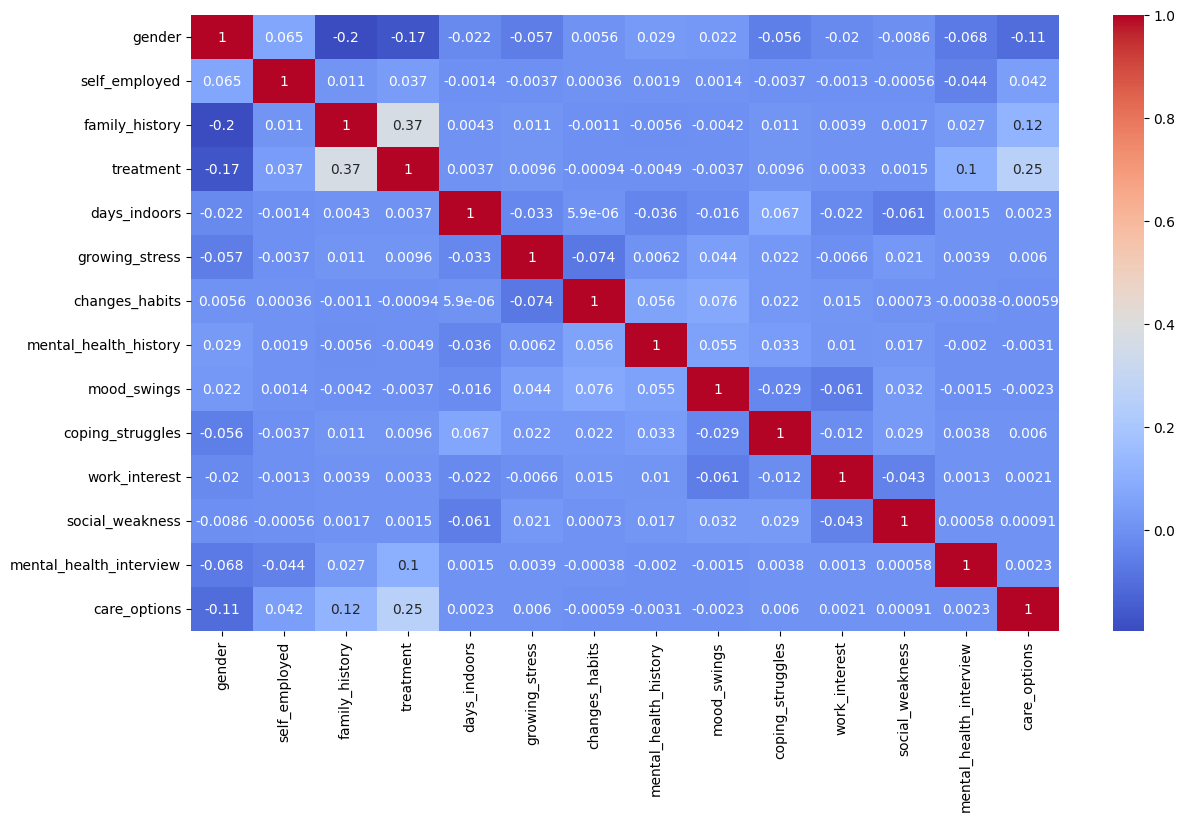

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data.corr()
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.show()

#EDA

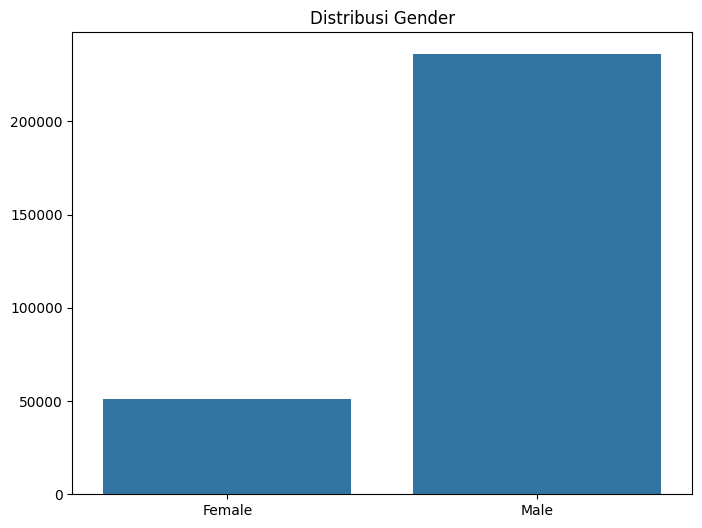

In [ ]:
# 1. Bar Chart
plt.figure(figsize=(8,6))

data = data_cleaned
sns.countplot(x='gender', data=data)

plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])

plt.xlabel('')
plt.ylabel('')
plt.title('Distribusi Gender')
plt.show()

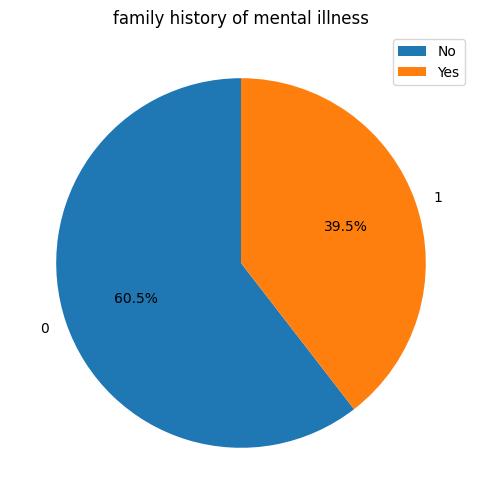

In [ ]:
# 2. Pie Chart
plt.figure(figsize=(8,6))
data['family_history'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.legend(labels=['No', 'Yes'],)
plt.title('family history of mental illness')
plt.xlabel('')
plt.ylabel('')
plt.show()

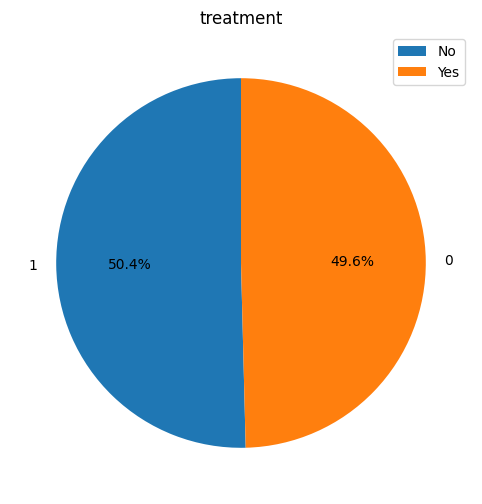

In [ ]:
plt.figure(figsize=(8,6))
data['treatment'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.legend(labels=['No', 'Yes'],)
plt.title('treatment')
plt.xlabel('')
plt.ylabel('')
plt.show()

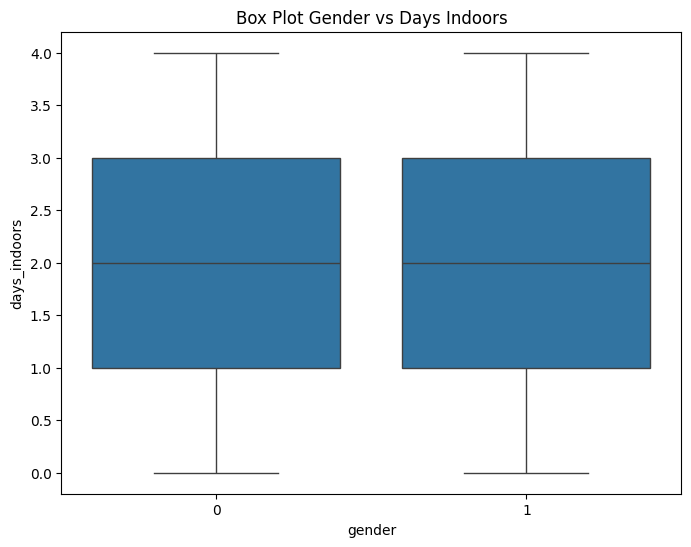

In [ ]:
# 4. Box Plot
plt.figure(figsize=(8,6))
sns.boxplot(x='gender', y='days_indoors', data=data)
plt.title('Box Plot Gender vs Days Indoors')
plt.show()

# **Modeling**

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.classification import RandomForestClassifier, GBTClassifier, LogisticRegression, MultilayerPerceptronClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
from pyspark.sql.functions import rand

# Create a Spark session
spark = SparkSession.builder.appName("MentalHealthAnalysis").getOrCreate()

# Assuming 'data' is your Pandas DataFrame, convert it to a Spark DataFrame
spark_df = spark.createDataFrame(data)

# Define features and label
feature_cols = data.drop('treatment', axis=1).columns.tolist()
label_col = 'treatment'

# Create a VectorAssembler to combine features into a single vector column
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")

# Split the data into training and testing sets
training_data, testing_data = spark_df.randomSplit([0.7, 0.3], seed=42) # Use a seed for reproducibility

# Create a pipeline to chain the assembler and the classifier
pipeline = Pipeline(stages=[assembler, RandomForestClassifier(featuresCol="features", labelCol=label_col, numTrees=50)])

model = pipeline.fit(training_data)

# Make predictions on the testing data
predictions = model.transform(testing_data)

In [ ]:
# Inisialisasi evaluator untuk berbagai metrik
evaluator_auc = BinaryClassificationEvaluator(labelCol=label_col, rawPredictionCol="rawPrediction", metricName="areaUnderROC")
evaluator_accuracy = MulticlassClassificationEvaluator(labelCol=label_col, predictionCol="prediction", metricName="accuracy")
evaluator_f1 = MulticlassClassificationEvaluator(labelCol=label_col, predictionCol="prediction", metricName="f1")
evaluator_precision = MulticlassClassificationEvaluator(labelCol=label_col, predictionCol="prediction", metricName="weightedPrecision")
evaluator_recall = MulticlassClassificationEvaluator(labelCol=label_col, predictionCol="prediction", metricName="weightedRecall")

In [ ]:
# List model yang akan digunakan
models = [
    ("Random Forest", RandomForestClassifier(featuresCol="features", labelCol=label_col, numTrees=50)),
    ("Gradient Boosted Tree", GBTClassifier(featuresCol="features", labelCol=label_col, maxIter=50)),
    ("Logistic Regression", LogisticRegression(featuresCol="features", labelCol=label_col, maxIter=50)),
    ("Multilayer Perceptron", MultilayerPerceptronClassifier(featuresCol="features", labelCol=label_col, layers=[len(feature_cols), 32, 16, 2], maxIter=50))
]

# Menampilkan hasil evaluasi untuk setiap model
for model_name, model in models:
    # Buat pipeline dengan model dan assembler
    pipeline = Pipeline(stages=[assembler, model])

    # Melatih model dengan data training
    trained_model = pipeline.fit(training_data)

    # Membuat prediksi pada data testing
    predictions = trained_model.transform(testing_data)

    # Evaluasi metrik
    auc = evaluator_auc.evaluate(predictions)
    accuracy = evaluator_accuracy.evaluate(predictions)
    f1_score = evaluator_f1.evaluate(predictions)
    precision = evaluator_precision.evaluate(predictions)
    recall = evaluator_recall.evaluate(predictions)

    # Menampilkan hasil metrik
    print(f"Model: {model_name}")
    print(f"  AUC: {auc:.3f}")
    print(f"  Accuracy: {accuracy:.3f}")
    print(f"  F1 Score: {f1_score:.3f}")
    print(f"  Precision: {precision:.3f}")
    print(f"  Recall: {recall:.3f}")
    print("-" * 50)

Model: Random Forest
  AUC: 0.771
  Accuracy: 0.715
  F1 Score: 0.714
  Precision: 0.717
  Recall: 0.715
--------------------------------------------------
Model: Gradient Boosted Tree
  AUC: 0.783
  Accuracy: 0.720
  F1 Score: 0.719
  Precision: 0.722
  Recall: 0.720
--------------------------------------------------
Model: Logistic Regression
  AUC: 0.756
  Accuracy: 0.701
  F1 Score: 0.701
  Precision: 0.702
  Recall: 0.701
--------------------------------------------------
Model: Multilayer Perceptron
  AUC: 0.765
  Accuracy: 0.710
  F1 Score: 0.709
  Precision: 0.710
  Recall: 0.710
--------------------------------------------------


Berdasarkan data yang diperoleh, kita dapat membandingkan performa model berdasarkan metrik yang telah dihitung (AUC, Accuracy, F1 Score, Precision, dan Recall). Dua model dengan performa terbaik adalah:

Gradient Boosted Tree (GBT):

AUC: 0.783 (tertinggi di antara semua model).
Akurasi, F1 Score, Precision, dan Recall juga relatif lebih baik dibanding model lain.


Random Forest (RF):

AUC: 0.772 (tertinggi kedua).
Performa keseluruhan lebih unggul daripada Logistic Regression dan Multilayer Perceptron.

In [ ]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Evaluator
evaluator = BinaryClassificationEvaluator(labelCol=label_col, metricName="areaUnderROC")

# Hyperparameter tuning untuk Random Forest
rf = RandomForestClassifier(featuresCol="features", labelCol=label_col)
rf_param_grid = ParamGridBuilder() \
    .addGrid(rf.numTrees, [50, 100]) \
    .addGrid(rf.maxDepth, [5, 10]) \
    .build()

rf_cv = CrossValidator(estimator=rf,
                       estimatorParamMaps=rf_param_grid,
                       evaluator=evaluator,
                       numFolds=3)  # 3-fold cross-validation

rf_pipeline = Pipeline(stages=[assembler, rf_cv])
# Ambil sampel data yang lebih kecil untuk pelatihan
smaller_training_data = training_data.sample(fraction=0.1, seed=42)
smaller_testing_data = testing_data.sample(fraction=0.1, seed=42)

rf_model = rf_pipeline.fit(smaller_training_data)

# Evaluasi ulang dengan model yang telah dituning
rf_predictions = rf_model.transform(smaller_testing_data)
rf_auc = evaluator.evaluate(rf_predictions)

In [ ]:
# Hyperparameter tuning untuk Gradient Boosted Tree
gbt = GBTClassifier(featuresCol="features", labelCol=label_col)
gbt_param_grid = ParamGridBuilder() \
    .addGrid(gbt.maxIter, [50]) \
    .addGrid(gbt.maxDepth, [5]) \
    .addGrid(gbt.stepSize, [0.1]) \
    .build()

gbt_cv = CrossValidator(estimator=gbt,
                        estimatorParamMaps=gbt_param_grid,
                        evaluator=evaluator,
                        numFolds=3)  # 3-fold cross-validation

gbt_pipeline = Pipeline(stages=[assembler, gbt_cv])
gbt_model = gbt_pipeline.fit(smaller_training_data)

gbt_predictions = gbt_model.transform(smaller_testing_data)
gbt_auc = evaluator.evaluate(gbt_predictions)

In [ ]:
print(f"Random Forest AUC after tuning: {rf_auc:.3f}")
print(f"Gradient Boosted Tree AUC after tuning: {gbt_auc:.3f}")

Random Forest AUC after tuning: 0.769
Gradient Boosted Tree AUC after tuning: 0.772
